#**Project Name**-$\color{green}{\text{Netflix Movies and TV Shows Clustering}}$:



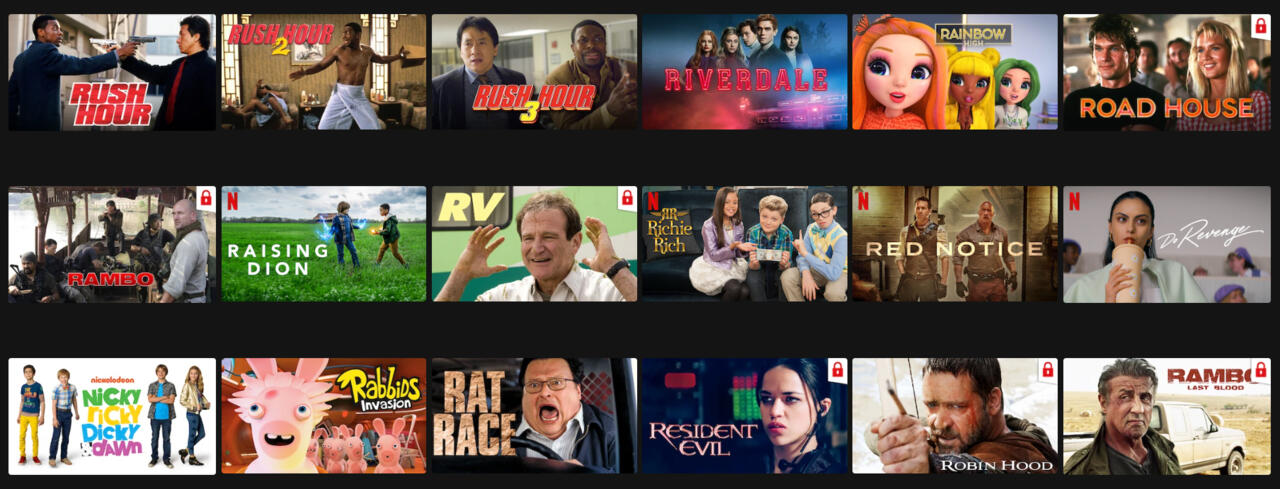

##### **Project Type**    -$\color{green}{\text{EDA/Regression/Classification/Unsupervised}}$:
##### **Contribution**    - $\color{green}{\text{Individual}}$:
##### **NAME -** $\color{green}{\text{DIWAN MOHD TAHA KHAN}}$:


##  **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Initially i have start with understanding the dataset, then i clean the data to make analysis ready.

Explore the data and understand the behaviour of the same.

Then i have prepare the dataset for creating clusters by various parameters wherein i can remove stop words, white spaces, numbers etc. so that i can get important words and based on that i shall form clusters.

Later i have used the silhouette method and k-means elbow method to find optimal number of clusters and built recommender system by cosine similarity and recommended top ten movies.



## <b>In this  project, you are required to do </b>

1. Acquiring the Dataset
2. Library Setup
3. Dataset Import
4. Identifying and Handling Missing Values
5. Transformation of Categorical Variables
6. Data Cleansing and Feature Enhancement
1.Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **GitHub Link -**

https://github.com/Asifdiwan23may1992/NETFLIX-MOVIES-AND-TV-SHOWS-M-L-POROJECT

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do

Exploratory Data Analysis
Understanding what type content is available in different countries
If Netflix has been increasingly focusing on TV rather than movies in recent years.
Clustering similar content by matching text-based features



**DATA OVERVIEW**

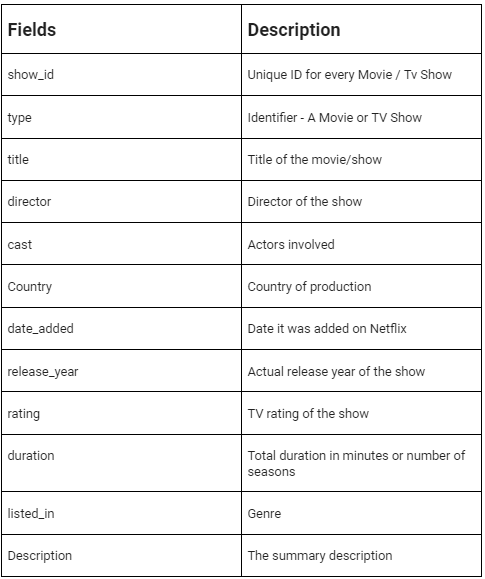

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install yellowbrick

In [ ]:
!pip install kaleido

In [ ]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [ ]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

### Dataset Loading

In [ ]:
# Load Dataset
netflix_data = pd.read_csv('/content/drive/MyDrive/DATA.csv/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_data.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("number of rows-", netflix_data.shape[0])
print("number of columns-",netflix_data.shape[1])

### Dataset Information

In [ ]:
# Dataset Info
netflix_data.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_data.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Check for null values.
for col in netflix_data.columns:
  null_rate = netflix_data[col].isnull().sum() / len(netflix_data) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

In [ ]:
# Visualizing the missing values
netflix_data.isnull()
sns.heatmap(netflix_data.isnull(),cbar=False)

### What did you know about your dataset?

***Points to be noted:*** 📝

* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset rows & Columns
netflix_data.shape

In [ ]:
# Dataset Describe
netflix_data.describe(include=("all"))

### Variables Description

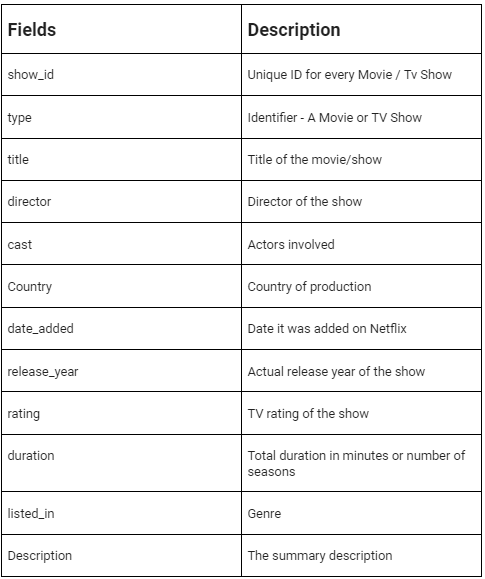

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in netflix_data.columns.tolist():
  print("No. of unique values in",i,"is",netflix_data[i].nunique())

## 3. ***Data Wrangling***

***Lets clean the data before we go any further.***🧹

***First replace few null values.*** 🔁

In [ ]:
# Number of null values in date_added.
netflix_data.date_added.isnull().sum()

In [ ]:
# Remove null values in date_added.
netflix_data.dropna(subset=['date_added'], inplace=True)

In [ ]:
# Number of null values in rating.
netflix_data.rating.isnull().sum()

In [ ]:
# Remove null values in rating.
netflix_data.dropna(subset=['rating'], inplace=True)

In [ ]:
# Check the shape of our data.
netflix_data.shape

***As for the rest of the columns containing null values, we will handle them accordingly in future analyses.***

***Second, add few more datetime features.***📅⏲️

In [ ]:
# Create new features to store date, day, month and year seperately.
# Use a more flexible format that can handle different date formats
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'], format="%B %d, %Y", errors="coerce")  # First convert date_added to date time format.
netflix_data['day_added'] = netflix_data['date_added'].dt.day            # Compute day.
netflix_data['year_added'] = netflix_data['date_added'].dt.year          # Compute year.
netflix_data['month_added'] = netflix_data['date_added'].dt.month        # Compute month.

In [ ]:
netflix_data.head()

***Now lets start with EDA.***

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***






# **Exploratory Data Analysis:** 📊

**Content Type On Netflix:** 🎞️📺

In [ ]:
# Create a pie chart for Type.
colors = ['	#db0000', '	#564d4d']
labels = ['Tv Show', 'Movie']
tv_show = netflix_data.type.value_counts()['TV Show']
movie = netflix_data.type.value_counts()['Movie']

fig = go.Figure(data=[go.Pie(labels=labels, values=[tv_show, movie], hole=.6)])
fig.update_layout(
    title_text="Type of content watched on Netflix",title_x=0.5, legend=dict(x=0.9),height=500, width=500,
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Type of content.', font_size=20, showarrow=False)])
fig.update_traces(marker=dict(colors=colors))

fig.show('png')

***69.1% of the content available on Netflix are movies; the remaining 30.9% are TV Shows.***

## **Year_added, Month_added, and Day_added:**

### **Content growth over years:**📈

In [ ]:
# Split the data into TV Shows and Movies
tv_show = netflix_data[netflix_data["type"] == "TV Show"]
movie = netflix_data[netflix_data["type"] == "Movie"]

# Count the number of TV Shows and Movies added each year
tv_show_counts = tv_show["year_added"].value_counts().reset_index()
tv_show_counts.columns = ["year_added", "count"]
tv_show_counts = tv_show_counts.sort_values("year_added")

movie_counts = movie["year_added"].value_counts().reset_index()
movie_counts.columns = ["year_added", "count"]
movie_counts = movie_counts.sort_values("year_added")

# Create traces
trace1 = go.Scatter(x=tv_show_counts["year_added"], y=tv_show_counts["count"],
                    mode='lines+markers', name='TV Shows', marker=dict(color='red'))
trace2 = go.Scatter(x=movie_counts["year_added"], y=movie_counts["count"],
                    mode='lines+markers', name='Movies', marker=dict(color='blue'))

# Create the layout
layout = go.Layout(
    title="Content Added Over the Years",
    title_x=0.5,
    legend=dict(x=0.4, y=1.1, orientation="h"),
    xaxis_title="Year Added",
    yaxis_title="Count",
    template="plotly_white"
)

# Create the figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Save the figure and show it
fig.write_image("images/content_added_over_year.png", scale=5)
fig.show()

In [ ]:
# Check why does it suddenly drop in 2021.
len(netflix_data[netflix_data['year_added'] == 2021])

* **NOTE:-**
* Growth in the number of movies on Netflix is much higher than tv shows.
* From 2015 we can see a noticeable addition in the number of movies and tv shows uploaded by Netflix on its platform.
* The highest number of movies and tv shows got added in 2019 and 2020.
* The line plot shows very few movies, and tv shows got added in 2021. It is due to very little data collected from the year 2021.

### **In which month do most movies and tv shows get added?**🗓️

In [ ]:
# Create dataframe to store manth values and counts.
months_df = pd.DataFrame(netflix_data.month_added.value_counts())
months_df.reset_index(inplace=True)
months_df.rename(columns={'index':'month', 'month_added':'count'}, inplace=True)

In [ ]:

# Count the number of contents added each month
months_df = netflix_data['month_added'].value_counts().reset_index()
months_df.columns = ['month', 'count']
months_df = months_df.sort_values('month')  # Ensure the months are in order (you might need to adjust this for proper month sorting)

# Create the bar chart
fig = go.Figure(data=[
    go.Bar(
        x=months_df['month'],
        y=months_df['count'],
        text=months_df['count'],
        textposition='auto',
        marker=dict(color=months_df['count'], colorscale=['#db0000', '#564d4d'])
    )
])

# Update layout
fig.update_layout(
    title={
        'text': 'Month-wise Addition of Movies and Shows to the Platform',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    autosize=False,
    width=1000,
    height=500,
    xaxis_title="Month",
    yaxis_title="Count",
    template="plotly_white"
)

# Save the figure and show it
fig.write_image("images/content_added_over_months.png", scale=5)
fig.show('png')

* **NOTE:-**
* Most of the content is uploaded either by year ending or beginning.

* October, November, December, and January are months in which many shows and movies get uploaded to the platform.

* It might be due to the winter, as in these months people may stay at home and watch shows and movies in their free time.

* **Which days are more prominent?**

In [ ]:
# Assuming 'netflix_data' is your DataFrame and 'day_added' is the relevant column
days_df = pd.DataFrame(netflix_data['day_added'].value_counts()).reset_index()
days_df.columns = ['day', 'count']



In [ ]:
print(days_df)

In [ ]:
# Create the bar chart
fig = px.bar(
    days_df,
    x="day",
    y="count",
    text_auto=True,
    color='count',
    color_continuous_scale=['#db0000', '#564d4d']
)

# Updating the layout
fig.update_layout(
    title_text='Which days are more prominent',
    title_y=0.95,
    title_x=0.5,
    title_xanchor='center',
    title_yanchor='top',
    autosize=False,
    width=1200,
    height=600
)

# Show the figure as a PNG image
fig.show('png')


* **NOTE:-**
* Most of the content is uploaded at the beginning, middle, or the end of a month.
* Which makes 1st, 15th or 31st of a month more prominent in getting new tv shows and movies.

### **Now lets see how much content is produced by different countries.**🌍🌎🌏

In [ ]:
# Import dataset containing Contries and their codes.
country_code_df = pd.read_csv('/content/drive/MyDrive/DATA.csv/country_code.csv', usecols=['Country_name', 'code_3digit'])

In [ ]:
country_code_df.head()

In [ ]:
import pandas as pd
from collections import Counter

# Assuming 'netflix_data' is your DataFrame and 'country' is the relevant column

# Drop missing values, split the string by ', ' and explode the list into rows
countries_series = netflix_data['country'].dropna().str.split(', ').explode()

# Convert all country names to lowercase
countries_series = countries_series.str.lower()

# Count the occurrences of each country
countries_dict = dict(Counter(countries_series))

print(countries_dict)


In [ ]:
# Assuming 'country_code_df' is your DataFrame with country codes and 'Country_name' is the relevant column
country_code_df['Count'] = country_code_df['Country_name'].apply(lambda x: countries_dict.get(x.lower(), 0))

print(country_code_df)


In [ ]:
# Country codes df with country counts.
country_code_df.head()

In [ ]:
# Create Geo plot to see which country produces more content.

# Define data
data = dict(type='choropleth',
            locations = country_code_df['code_3digit'],
            z = country_code_df['Count'],
            text = country_code_df['Country_name'],
            marker = dict(line = dict (color = 'green',width = 0.5)),
            # colorbar = dict(autotick = True, title = '')
            )

# Define layout.
layout = dict(title = 'Country-wise Content Production', title_x=0.5,height=700, width=1500,
              geo = dict( projection = {'type':'times'},
                         showlakes = False,
                         showcoastlines = False,
                         showframe = False,
                         showocean = False,
                         showland = False,
                         fitbounds = 'locations',
                         ))

# Plot it.
country_plot = go.Figure(data = [data],
              layout = layout
              )
# iplot(country_plot)
country_plot.show('png')

In [ ]:
# Lets find the top ten countries that produce most of the content.
top_ten = Counter(countries_dict).most_common(10)

country = [_[0] for _ in top_ten][::-1]
count = [_[1] for _ in top_ten][::-1]
trace1 = go.Bar(y=country, x=count, orientation="h", name="", marker=dict(color='#db0000'))

data = [trace1]
layout = go.Layout(title="Countries with most content", title_x = 0.5, height=500, width=1200, legend=dict(x=0.5, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
# fig.show()
fig.show('png')


* **NOTE:-**
* The majority of the content providers are in the above top-ten countries.
* Among which USA, India, and Uk create more than half of the tv shows and movies on the platform.

 **We saw before in which year most of the content was added, but what about the year it released.**

In [ ]:
# Assuming 'netflix_data' is your DataFrame and 'release_year' is the relevant column

# Define the bins and bin the data
bins = [1924, 1999, 2010, 2021]
labels = ['1925-1999', '2000-2010', '2011-2021']
release_yr_bin = pd.cut(netflix_data['release_year'], bins=bins, labels=labels, right=False)

# Get value counts and convert to DataFrame
release_yr_bin_df = release_yr_bin.value_counts().reset_index()

# Rename columns
release_yr_bin_df.columns = ['year_interval', 'count']

# Ensure 'year_interval' column is of string type
release_yr_bin_df['year_interval'] = release_yr_bin_df['year_interval'].astype(str)

print(release_yr_bin_df)


In [ ]:
# Plot it.
fig = px.pie(release_yr_bin_df, values='count', names='year_interval', color_discrete_sequence=px.colors.sequential.Aggrnyl, title='```When was most content released.',height=500, width=500)
# fig.show()
fig.show('png')

* **NOTE:-**

* 82% of the content available was released between 2010 and 2021.
* 17.28% of the content available was released before 2010.

### **We will create a wordcloud to see which words appear the most in the titles for movies and tv shows.**

In [ ]:
# Import the required libraries.
from wordcloud import WordCloud, STOPWORDS

# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)

# iterate through the column.
for val in netflix_data.title:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

** NOTE-**
* Most repeated words in title include Christmas, Love, World, Man, and Story.
* We saw that most of the movies and tv shows got added during the winters, which tells why Christmas appeared many times in the titles.

### **Similarly create wordcloud for description to see which words appear the most.**

In [ ]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)

# iterate through the column.
for val in netflix_data.description:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat').generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

* ***Most occurring words in the description of the tv shows and movies are Family, Friend, Love, Life, Woman, Man.***

**Which directors have most number of the movies and tv shows?**

In [ ]:
# Replace the null values in director.
netflix_data['director']=netflix_data['director'].fillna('')

In [ ]:
# Get the top 25 directors excluding null values
directors_list = netflix_data['director'].value_counts().reset_index().head(25)[1:]
directors_list.columns = ['director', 'count']

# Create the bar chart
fig = px.bar(directors_list, x='director', y='count', text_auto=True,
             color='count', color_continuous_scale=['#db0000', '#564d4d'])

# Update the layout of the figure
fig.update_layout(
    title_text='Top Directors by Count',
    title_y=0.95,
    title_x=0.5,
    title_xanchor='center',
    title_yanchor='top',
    autosize=False,
    width=1200,
    height=600
)

# Show the figure
fig.show('png')


* Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathina, Jay Chapman are the top 5 directors which highest number of movies and tv shows.

 * **Cast:**

**Do any of these shows and movies have your favourite actors in them?**

In [ ]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [ ]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(netflix_data)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)  # dropped the nan values in the dataframe which was present at 106th index.

In [ ]:
actor_list.head(10)

In [ ]:
# Plot it.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#564d4d', '#db0000'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

* **NOTE:-**
* Happy to see 6 of the actors in the top ten list of most numbers tv shows and movies are from India.

In [ ]:
netflix_data['cast'].isnull().sum()

In [ ]:
# Replace the null values in cast.
netflix_data['cast']=netflix_data['cast'].fillna('')

In [ ]:
netflix_data['cast'].isnull().sum()

## **Content vs Country:**

 What kind of content is available in different countries in recent years?


In [ ]:
country_null_values = netflix_data.country.isnull().sum()
print(f'We had observed that variable country had {country_null_values} null values in it, we will replace these null values with the most occurring country which is United States.')

In [ ]:
''' Since there are many countries, we will take the top ten countries that produce
     content and see what type of content these countries provide the most?'''

netflix_data['country'].fillna('United States', inplace=True)
netflix_data['country_single'] = netflix_data['country'].apply(lambda x: x.split(",")[0])
country_order = netflix_data['country_single'].value_counts()[:10].index
countryVScontent = netflix_data[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[country_order].reset_index()
countryVScontent

In [ ]:
# Create the figure
fig = go.Figure()

# Add trace for Movies
fig.add_trace(go.Bar(
    y=countryVScontent['country_single'],
    x=countryVScontent['Movie'],
    name='Movies',
    orientation='h',
    marker=dict(color='rgba(219, 0, 0, 1)')
))

fig.add_trace(go.Bar(
    y=countryVScontent['country_single'],
    x=countryVScontent['TV Show'],
    name='TV Show',
    orientation='h',
    marker=dict(
        color='rgba(86, 77, 77, 1)'
    )
))

fig.update_layout(barmode='stack',
                   title={'text': 'Top ten countries and the content they provide.',
                          'y':0.89,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'}
                  )
# fig.show()
fig.show('png')

In [ ]:
#import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# Add trace for Movies
fig.add_trace(go.Bar(
    y=countryVScontent.index,
    x=countryVScontent['Movie'],
    name='Movies',
    orientation='h',
    marker=dict(color='rgba(219, 0, 0, 1)')
))

# Add trace for TV Shows
fig.add_trace(go.Bar(
    y=countryVScontent.index,
    x=countryVScontent['TV Show'],
    name='TV Shows',
    orientation='h',
    marker=dict(color='rgba(86, 77, 77, 1)')
))

# Update the layout
fig.update_layout(
    barmode='stack',
    title={
        'text': 'Top ten countries and the content they provide.',
        'y': 0.89,
        'x': 0.5,
        'font': {'size': 25},
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Show the figure as a PNG image
fig.show('png')


* **NOTE:-**
* The United States is a leading producer of both types of content; this makes sense since Netflix is a US company.

* The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.

* On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.

**Now lets find which Genre is more popular in these countries.**

In [ ]:
# Create subset of dataset with required data.
conuntryVSgenre = netflix_data[['country', 'listed_in']]

# Create a function to seperate all genres and store counts for each.
def country_wise_genre(country):
  country_genre = conuntryVSgenre[conuntryVSgenre['country'] == country]
  country_genre = ", ".join(country_genre['listed_in'].dropna()).split(", ")
  country_genre_dict = dict(Counter(country_genre))
  return country_genre_dict

# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

In [ ]:
# Plot the above data.
df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen']

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show('png')

* **NOTE:-**
* Drama, International Movies, and Comedies seem popular choices in most countries.

* British and International Tv Shows dominate in the United Kingdom.

* Regional specialties such as Anime in Japan and Korean Tv shows in South Korea are more prominent in these countries; This makes sense as anime has always been popular in Japan, and the rising k-pop culture explains the increase in Korean Tv Shows.

* It's also observed that in the countries where the regional language is not English, International Tv Shows and Movies are more in demand.

## **Year_added Vs Type:**

### **Is Netflix has increasingly focusing on TV rather than movies in recent years?**

**Hypothesis Testing to check is there is any relation between year_added and type:**

* ***Null Hypothesis:*** *year_added has no impact on type of content that gets added to the platform.*
* ***Alternative Hypothesis:*** *year_added has impact on type of content that gets added to the platform.*

***Set significance level to 0.05.***

In [ ]:
hypo_data = pd.crosstab(netflix_data['type'], netflix_data['year_added'], margins=False)
hypo_data

In [ ]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(hypo_data)

p

***The p value is smaller than significance level , we will reject the null hypothesis and accept the alternative hypothesis.***

In [ ]:
# Now lets check what type of content got added in the past few years.

'''We will only check for the type of genres that got added in the years 2018-2021 for better visualization. '''

# Create subset of data with required columns.
recent_years = pd.DataFrame(netflix_data.groupby(['year_added', 'listed_in'])['listed_in'].count())
recent_years.rename(columns={'listed_in':'Count'}, inplace=True)
recent_years = recent_years.reset_index()
recent_years.drop(recent_years[recent_years.year_added < 2018].index, inplace=True)

''' There are many rows with multiple genre entries therefore we will
 create a function to split each of them and get their respective counts.'''

def seperate_all_genre(year):
  year_added = recent_years[recent_years['year_added'] == year]
  year_added = ", ".join(year_added['listed_in'].dropna()).split(", ")
  year_added_dict = dict(Counter(year_added))
  return year_added_dict
# Create a list of years.
yr_list = [2018,2019,2020,2021]
# Iterate through all values in yr_list.
yr_genre_count_list = {}
for i in yr_list:
  data = seperate_all_genre(i)
  yr_genre_count_list[i] = data
  yr_genre_count_df = pd.DataFrame(yr_genre_count_list).reset_index()
  yr_genre_count_df.rename({'index':'Genre'}, inplace=True, axis=1)

In [ ]:
# Plot the above data.
df = yr_genre_count_df.sort_values([2018,2019,2020,2021],ascending=False)
fig = go.Figure()
fig.add_trace(go.Scatter(y=df[2018], x=df['Genre'],
                    mode='lines+markers',
                    name=2018))
fig.add_trace(go.Scatter(y=df[2019], x=df['Genre'],
                    mode='lines+markers',
                    name=2019))
fig.add_trace(go.Scatter(y=df[2020], x=df['Genre'],
                    mode='lines+markers',
                    name=2020))
fig.add_trace(go.Scatter(y=df[2021], x=df['Genre'],
                    mode='lines+markers',
                    name=2021))
fig.update_xaxes(tickangle=-90)
fig.update_layout(title={'text': 'Most added Genres in recent years.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,legend=dict(x=0.38, y=1.1, orientation="h"))

# fig.show()
fig.show('png')

* **Note:-**
* The first thing that comes to my mind when I hear Netflix is Tv Shows,  and to be honest, I rarely watch any movies on the platform.

* From the EDA we did in the beginning, we saw that there are more Movies than Tv Shows on Netflix, which might be enough to assume that Netflix focuses more on Movies than Tv Shows. But the data proves this assumption wrong.

* The above line plot shows that Netflix has been adding many International Tv Shows, Tv Dramas, Tv Comedy Shows and many more tv shows in the recent years compared to Movies.

* From this observation, we can say that Netflix might be shifting slowly towards Tv Shows.

## **Duration:** ⌛

In [ ]:
# Create subsets for tv shows and movies.
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']
movies = netflix_data[netflix_data['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

In [ ]:
# Plot the above durations.
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_tv_shows['duration'], color='#db0000')
plt.title('Duration of Tv Shows.')
plt.show()

* **Note:-**
* Most of the Tv Shows last for 1 or 2 seasons, it is rare for a show to have more than 5 seasons.

In [ ]:
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(data=duration_movies['duration'], color='#db0000')
plt.title('Duration of movies')
plt.show()

* **Note:-**
 * Most of the movies last for 90 to 120 minutes.

* **Rating:** ⭐⭐⭐

*Each TV show and movie on Netflix is assigned a maturity rating to help members make informed choices for themselves and their children.Netflix determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.*

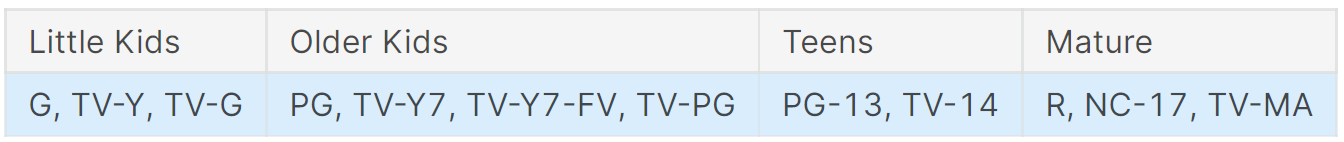

In [ ]:
movies_rating = dict(movies['rating'].value_counts())
tv_shows_rating = dict(tv_shows['rating'].value_counts())

In [ ]:
# Plot the count of ratings for Tv shows and movies to understand them better.
fig = go.Figure()
fig.add_trace(go.Bar(x=list(tv_shows_rating.keys()),
                y=list(tv_shows_rating.values()),
                text=list(tv_shows_rating.values()),
                name='Tv-Shows',
                marker_color='rgb(219,0,0)'
                ))
fig.add_trace(go.Bar(x=list(movies_rating.keys()),
                y=list(movies_rating.values()),
                text=list(movies_rating.values()),
                name='Movies',
                marker_color='rgb(86,77,77)'
                ))

fig.update_layout(
    title='Ratings',title_x=0.47,
    xaxis_tickfont_size=15,
    yaxis=dict(
        title='Count',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.19,
    bargroupgap=0.2
)
# fig.show()
fig.show('png')

* **NOTE:-**

* TV-MA tops the charts, indicating that mature content is more popular on Netflix.
* This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

## ***5. Feature Engineering & Data Pre-processing***

### **We will be using text columns to create clusters for our data.**

In [ ]:
cluster_df = netflix_data[['title']]
cluster_df['cluster_data'] = (netflix_data['description'] + ' ' + netflix_data['listed_in'] + ' ' + netflix_data['director'] + ' ' + netflix_data['cast'] + ' ' + netflix_data['country'] + ' ' + netflix_data['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

In [ ]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

In [ ]:
bag_of_words = cluster_df.cluster_data

# **Create Clusters:**

In [ ]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

In [ ]:
t_vectorizer.get_feature_names_out()

### **Lets perform Dimensionality Reduction:**

In [ ]:
pca = PCA()
pca.fit(X.toarray())

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


* **Note:-**
* We can see from the above plot almost 95% of the variance can be explained by 5000 components.
* Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.

In [ ]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

In [ ]:
X_transformed

### **Get optimum K value using Metric:Shilhouette.**

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

In [ ]:
silhouette_score_analysis(22)

### **Elbow method to find optimum k value:**

In [ ]:
plt.figure(figsize=(10,6), dpi=120)
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## **Perform Clustering considering k=10.**

In [ ]:
plt.figure(figsize=(10,6), dpi=120)

kmeans= KMeans(n_clusters=10, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe.
netflix_data['cluster_number'] = kmeans.labels_

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = netflix_data[['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])
  # Create stopword list:
  stopwords = set(STOPWORDS)
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

In [ ]:
for i in range(10):
  func_select_Category(i,'listed_in')

# **Get Recommendations:**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
t_vectorizer = TfidfVectorizer()
count_matrix= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

In [ ]:
indices = pd.Series(cluster_df.index)
indices[:5]

In [ ]:
# function that takes in movie title as input and returns the top 10 recommended movies
def recommendations(Title, cosine_sim = cosine_sim):

    recommended_movies = []

    # gettin the index of the movie that matches the title
    idx = indices[indices == Title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)

    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(cluster_df.index)[i])

    return recommended_movies

In [ ]:
# Lets try getting recommendations for Movies.
movie_recommendations = pd.DataFrame(recommendations('Bad Boys'), columns=['Recommendations'])
movie_recommendations.head(11)

In [ ]:
# Lets try getting recommendations for Tv-Shows.
tvshows_recommendations = pd.DataFrame(recommendations('13 Reasons Why'), columns=['Recommendations'])
tvshows_recommendations.head(11)

# **Conclusions:**


* Majority of Netflix content is movies.

* Recently, Netflix has been focusing more on TV shows.

* Most content is released either at the end or beginning of the year.

* The United States and India are among the top 5 countries producing Netflix content.

* 6 of the top 10 actors with the most content are from India.

* TV-MA rating tops the charts, indicating the popularity of mature content on Netflix.

* The optimal number of clusters for grouping data was found to be 10 (k=10).

* A simple recommender system was created using cosine similarity to provide recommendations for movies and TV shows.









# **Future Scope:**

* Integrating this dataset with external datasets like IMDB ratings and Rotten Tomatoes can reveal more interesting findings.

* More time could be dedicated to building a better recommender system.

* The improved recommender system can later be deployed on the web for usage.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***